In [2]:
#Initialization of modules
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.optimize
import random

In [3]:
#golden section algorithm
def golden(func,a,b):
    ak=a
    bk=b
    N_iter=0
    N_func=0
    while abs(ak-bk)>0.001:
        N_iter=N_iter+1
        if (N_iter==1):
            x1=ak+(3-np.sqrt(5))/2*(bk-ak)
            x2=bk+(np.sqrt(5)-3)/2*(bk-ak)
            if func(x1)<=func(x2):
                bk=x2
                x2=x1
                N_func=N_func+2
                i='l'
            else:
                ak=x1
                x1=x2
                N_func=N_func+2
                i='r'
        else:
            if (i=='r'):
                x2=bk+(np.sqrt(5)-3)/2*(bk-ak)
                if func(x1)<=func(x2):
                    bk=x2
                    x2=x1
                    N_func=N_func+1
                    i='l'
                else:
                    ak=x1
                    x1=x2
                    N_func=N_func+1
                    i='r'
            else:
                x1=ak+(-np.sqrt(5)+3)/2*(bk-ak)
                if func(x1)<=func(x2):
                    bk=x2
                    x2=x1
                    N_func=N_func+1
                    i='l'
                else:
                    ak=x1
                    x1=x2
                    N_func=N_func+1
                    i='r'
    return (ak+bk)/2,N_iter,N_func

In [4]:
#squared residual sum for linear approximation
def d_lin(a,b):
    summa=0
    for i in range(0,101):
        summa=summa+(a*x[i]+b-y[i])**2
    return summa

In [5]:
#squared residual sum for rational approximation
def d_rat(a,b):
    summa=0
    for i in range(0,101):
        summa=summa+(a/(1+b*x[i])-y[i])**2
    return summa

In [6]:
#random generation of sample (x,y)
alpha=random.uniform(0,1)
beta=random.uniform(0,1)
x = np.array([k/101 for k in range(101)])
y = np.array([alpha * x[k] + beta + np.random.standard_normal(1) for k in range(101)])
print(x)
print(y)

[0.         0.00990099 0.01980198 0.02970297 0.03960396 0.04950495
 0.05940594 0.06930693 0.07920792 0.08910891 0.0990099  0.10891089
 0.11881188 0.12871287 0.13861386 0.14851485 0.15841584 0.16831683
 0.17821782 0.18811881 0.1980198  0.20792079 0.21782178 0.22772277
 0.23762376 0.24752475 0.25742574 0.26732673 0.27722772 0.28712871
 0.2970297  0.30693069 0.31683168 0.32673267 0.33663366 0.34653465
 0.35643564 0.36633663 0.37623762 0.38613861 0.3960396  0.40594059
 0.41584158 0.42574257 0.43564356 0.44554455 0.45544554 0.46534653
 0.47524752 0.48514851 0.4950495  0.5049505  0.51485149 0.52475248
 0.53465347 0.54455446 0.55445545 0.56435644 0.57425743 0.58415842
 0.59405941 0.6039604  0.61386139 0.62376238 0.63366337 0.64356436
 0.65346535 0.66336634 0.67326733 0.68316832 0.69306931 0.7029703
 0.71287129 0.72277228 0.73267327 0.74257426 0.75247525 0.76237624
 0.77227723 0.78217822 0.79207921 0.8019802  0.81188119 0.82178218
 0.83168317 0.84158416 0.85148515 0.86138614 0.87128713 0.88118

[a,b] = [array([0.99495572]), array([0.20544786])]


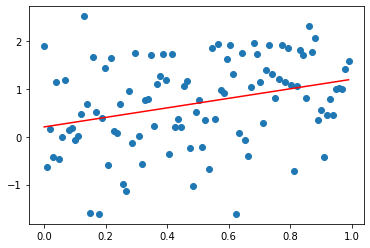

In [12]:
#determination of parameters for linear approximation using linalg
A1 = np.vstack([x, np.ones(len(x))]).T
a, b = np.linalg.lstsq(A1, y, rcond=None)[0]

plt.scatter(x, y)
plt.plot(x, a*x+b, 'r')
print('[a,b] =',[a, b])

In [328]:
#multidimensional brute-force method
def bruteforce1(func):
    f=[]
    N=0
    for i in range(0,1000):
        a=i/1000
        for j in range(0,1000):
            N=N+1
            b=j/1000
            f.append((a,b,func(a,b)))
    return min(f, key = lambda t: t[2])[0],min(f, key = lambda t: t[2])[1],N

In [345]:
#determination of parameters and the number of iterations (f-calculations)
Brute_lin=bruteforce1(d_lin)
Brute_rat=bruteforce1(d_rat)
print(Brute_lin[0],Brute_lin[1],Brute_lin[2],Brute_rat[0],Brute_rat[1],Brute_rat[2])
print(d_lin(Brute_lin[0],Brute_lin[1]))
print(d_rat(Brute_rat[0],Brute_rat[1]))

0.994 0.206 1000000 0.698 0.0 1000000
0.994 0.206 1000000 0.698 0.0 1000000
0.994 0.206 1000000 0.698 0.0 1000000
0.994 0.206 1000000 0.698 0.0 1000000


In [287]:
#Coordinate Descent method
def gauss1(func,x,y):
    a_prev,b_prev=0,0
    a_now,b_now=1,1
    N_iter=0
    N_func=0
    f=[]
    while abs(a_now-a_prev)>0.001 and abs(b_now-b_prev)>0.001: 
        f=[]
        a_prev=a_now
        b_prev=b_now
        def gauss_a(a):
            summa=func(a,b_prev)
            return summa
        #for a in range(0,1000):
        #    f.append((a/1000,b_prev,func(x,y,a/1000,b_prev)))
        #    N_func=N_func+1
        #    N_iter=N_iter+1
        #a_now=min(f, key = lambda t: t[2])[0]
        a_now=golden(gauss_a,-10,10)[0]
        N_iter=N_iter+golden(gauss_a,-10,10)[1]
        N_func=N_func+golden(gauss_a,-10,10)[2]
        f=[]
        def gauss_b(b):
            summa=func(a_now,b)
            return summa
        #for b in range(0,1000):
        #    f.append((a_now,b/1000,func(x,y,a_now,b/1000)))
        #    N_func=N_func+1
        #    N_iter=N_iter+1
        #b_now=min(f, key = lambda t: t[2])[1]
        b_now=golden(gauss_b,-10,10)[0]
        N_iter=N_iter+golden(gauss_b,-10,10)[1]
        N_func=N_func+golden(gauss_b,-10,10)[2]
    return a_now,b_now,N_func,N_iter

In [288]:
#determination of gauss parameters and the number of iterations (f-calculations)
(a_gauss_lin,b_gauss_lin,N_gauss_lin_func,N_gauss_lin_it)=gauss1(d_lin,x,y)
(a_gauss_rat,b_gauss_rat,N_gauss_rat_func,N_gauss_rat_it)=gauss1(d_rat,x,y)
print(a_gauss_lin,b_gauss_lin,N_gauss_lin_it,N_gauss_lin_func,a_gauss_rat,b_gauss_rat,N_gauss_rat_it,N_gauss_rat_func)
print(d_lin(a_gauss_lin,b_gauss_lin))
print(d_rat(a_gauss_rat,b_gauss_rat))

0.9903369994111498 0.20792276049414865 840 880 0.4278639912513703 -0.6776357316897581 630 660
[78.65557418]
[79.76855647]


In [17]:
#squared residual sum for linear approximation (for Nelder-Mead)
def d_lin_NM(params):
    a,b=params
    summa=0
    for i in range(0,101):
        summa=summa+(a*x[i]+b-y[i])**2
    return summa

In [73]:
#determination of Nelder-Mead linear parameters and the number of iterations (f-calculations)
result=scipy.optimize.minimize(d_lin_NM,np.array([1,1]),args=(), method='Nelder-Mead',options={'xatol': 0.001,'disp': True})
print(result.x)
print(d_lin_NM(result.x))

Optimization terminated successfully.
         Current function value: 78.655394
         Iterations: 30
         Function evaluations: 57
[0.99532972 0.20539959]
[78.65539413]


In [19]:
#squared residual sum for rational approximation (for Nelder-Mead)
def d_rat_NM(params):
    a,b=params
    summa=0
    for i in range(0,101):
        summa=summa+(a/(x[i]*b+1)-y[i])**2
    return summa

In [190]:
#determination of Nelder-Mead rational parameters and the number of iterations (f-calculations)
result_rat=scipy.optimize.minimize(d_rat_NM,np.array([1,1]),args=(), method='Nelder-Mead',options={'xatol': 0.001,'disp': True})
print(result_rat.x)
print(d_rat_NM(result_rat.x))

Optimization terminated successfully.
         Current function value: 79.768267
         Iterations: 33
         Function evaluations: 63
[ 0.42559296 -0.67999028]
[79.7682671]


In [24]:
#sum of squared residuals for gradient methods (linear)
def d_lin_grad(params):
    a,b=params[0][0],params[0][1]
    summa=0
    for i in range(0,101):
        summa=summa+(a*x[i]+b-y[i])**2
    return summa

In [232]:
#sum of squared residuals for gradient methods (rational)
def d_rat_grad(params):
    a,b=params[0][0],params[0][1]
    summa=0
    for i in range(0,101):
        summa=summa+(a/(x[i]*b+1)-y[i])**2
    return summa

In [26]:
#gradient of sum-function (linear)
def d_lin_deriv(params):
    a,b=params[0],params[1]
    dsda=0
    dsdb=0
    for i in range(0,101):
        dsda=dsda+2*x[i]*(a*x[i]+b-y[i])
        dsdb=dsdb+2*(a*x[i]+b-y[i])
    return np.array([dsda,dsdb])

In [27]:
#gradient of sum-function (rational)
def d_rat_deriv(params):
    a,b=params[0],params[1]
    dsda=0
    dsdb=0
    for i in range(0,101):
        dsda=dsda+2*(a/(1+b*x[i])-y[i])*(1/(1+b*x[i]))
        dsdb=dsdb+2*(a/(1+b*x[i])-y[i])*(-a*x[i]/((1+b*x[i])**2))
    return np.array([dsda,dsdb])

In [332]:
#Gradient Descent method
def grad_descent(func,grad,x,y,a0,b0):
    N_iter=0
    a_now=[np.array([a0,b0])]
    gk=grad(a_now[0])
    N_func=1
    gk=np.array([gk[0][0],gk[1][0]])
    #f=[]
    #for beta in range(1000):
    #    f.append((beta/1000,func(a_now-(beta/1000)*gk.T)))
    #    N_iter=N_iter+1
    #    N_func=N_func+1
    #beta=min(f,key = lambda t: t[1])[0]
    def gauss(beta):
        return func(a_now-beta*gk.T)
    beta=golden(gauss,-10,10)[0]
    N_iter=N_iter+golden(gauss,-10,10)[1]
    N_func=N_func+golden(gauss,-10,10)[2]
    f=[]
    ak=a_now
    a_now=a_now-beta*gk.T
    k=1
    if abs(a_now[0][0]-ak[0][0])<0.001 and abs(a_now[0][1]-ak[0][1])<0.001:
        return a_now, N_iter, N_func
    while abs(a_now[0][0]-ak[0][0])>0.001 and abs(a_now[0][1]-ak[0][1])>0.001:
        k=k+1
        N_iter=N_iter+1
        g=grad(a_now[0])
        N_func=N_func+1
        g=np.array([g[0][0],g[1][0]])
        beta=np.dot(a_now[0]-ak[0],(g-gk))/np.dot((g-gk).T,(g-gk))
        t=a_now
        a_now=a_now-beta*g.T
        ak=t
        gk=g
    print(k)
    return a_now, N_iter, N_func

5
(array([[0.99494431, 0.20542634]]), 25, 27)


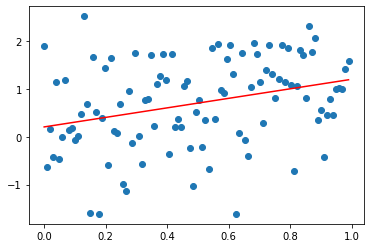

In [333]:
#Applying Gradient Descent to the data (linear)
descent_lin=grad_descent(d_lin_grad,d_lin_deriv,x,y,1,1)
print(descent_lin)
plt.scatter(x,y)
plt.plot(x, descent_lin[0][0][0]* x + descent_lin[0][0][1], 'r')

1
(array([[ 0.44702518, -0.7       ]]), 21, 23)
[80.19194017]


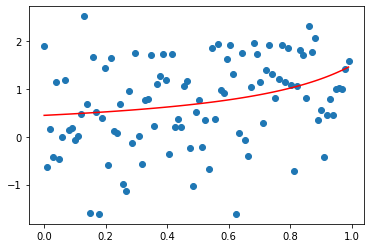

In [341]:
#Applying Gradient Descent to the data (rational)
descent_rat=grad_descent(d_rat_grad,d_rat_deriv,x,y,0,-0.7)
print(descent_rat)
print(d_rat_grad(descent_rat[0]))
plt.scatter(x,y)
plt.plot(x, descent_rat[0][0][0]/ (1 + descent_rat[0][0][1] * x), 'r')

In [330]:
#Conjugate gradients method
def conjugate_grad(func,grad,x,y,a0,b0):
    N_iter=0
    a_now=[np.array([a0,b0])]
    gk=grad(a_now[0])
    N_func=1
    gk=np.array([gk[0][0],gk[1][0]])
    #f=[]
    #for alpha in range(1000):
    #    f.append((alpha/1000,func(a_now-(alpha/1000)*gk.T)))
    #    N_iter=N_iter+1
    #    N_func=N_func+1
    #alpha=min(f,key = lambda t: t[1])[0]
    def gauss(alpha):
        return func(a_now-alpha*gk.T)
    alpha=golden(gauss,-10,10)[0]
    N_iter=N_iter+golden(gauss,-10,10)[1]
    N_func=N_func+golden(gauss,-10,10)[2]
    f=[]
    ak=a_now
    sk=-gk
    a_now=a_now-alpha*gk.T
    k=1
    if abs(a_now[0][0]-ak[0][0])<0.001 and abs(a_now[0][1]-ak[0][1])<0.001:
        return a_now, N_iter, N_func
    while abs(a_now[0][0]-ak[0][0])>0.001 and abs(a_now[0][1]-ak[0][1])>0.001:
        k=k+1
        g=grad(a_now[0])
        N_func=N_func+1
        g=np.array([g[0][0],g[1][0]])
        beta=np.dot(g.T,g)/np.dot(gk.T,gk)
        s_now=-g+beta*sk
        def gauss1(alpha):
            return func(a_now+alpha*s_now.T)
        alpha=golden(gauss1,-10,10)[0]
        N_iter=N_iter+golden(gauss1,-10,10)[1]
        N_func=N_func+golden(gauss1,-10,10)[2]
        #f=[]
        #for alpha in range(1000):
        #   N_iter=N_iter+1
        #    f.append((alpha/1000,func(a_now+(alpha/1000)*s_now.T)))
        #    N_func=N_func+1
        #alpha=min(f,key=lambda t: t[1])[0]
        t=a_now
        a_now=a_now+alpha*s_now.T
        ak=t
        gk=g
        sk=s_now
    print(k)
    return a_now, N_iter,N_func

6
(array([[0.9948279 , 0.20559939]]), 126, 138)


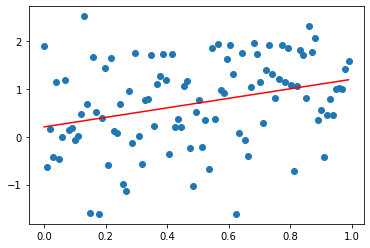

In [331]:
#Applying Conjugate Gradients method to the data (linear)
conjugate_lin=conjugate_grad(d_lin_grad,d_lin_deriv,x,y,1,1)
print(conjugate_lin)
plt.scatter(x,y)
plt.plot(x, conjugate_lin[0][0][0]* x + conjugate_lin[0][0][1], 'r')

6
(array([[ 0.60768516, -0.62551962]]), 126, 138)


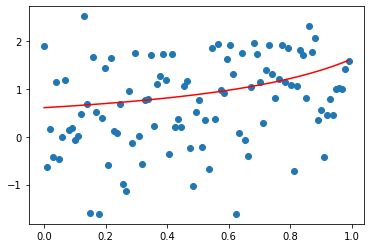

In [342]:
#Applying Conjugate Gradients method to the data (rational)
conjugate_rat=conjugate_grad(d_rat_grad,d_rat_deriv,x,y,-0.2,0.4)
print(conjugate_rat)
plt.scatter(x,y)
plt.plot(x, conjugate_rat[0][0][0]/(1+x*conjugate_rat[0][0][1]), 'r')

In [38]:
#gradient value for Newton method (linear)
def d_lin_deriv_new(params):
    a,b=params
    dsda=0
    dsdb=0
    for i in range(0,101):
        dsda=dsda+2*x[i]*(a*x[i]+b-y[i])
        dsdb=dsdb+2*(a*x[i]+b-y[i])
    dsda=dsda[0]
    dsdb=dsdb[0]
    return np.array([dsda,dsdb])

In [39]:
#gradient value for Newton method (rational)
def d_rat_deriv_new(params):
    a,b=params
    dsda=0
    dsdb=0
    for i in range(0,101):
        dsda=dsda+2*(a/(1+b*x[i])-y[i])*(1/(1+b*x[i]))
        dsdb=dsdb+2*(a/(1+b*x[i])-y[i])*(-a*x[i]/((1+b*x[i])**2))
    dsda=dsda[0]
    dsdb=dsdb[0]
    return np.array([dsda,dsdb])

In [40]:
#Hessian value for Newton method (linear)
def d_lin_hess(params):
    a,b=params
    dsdada=0
    dsdbdb=0
    dsdadb=0
    for i in range(0,101):
        dsdada=dsdada+2*(x[i]**2)
        dsdbdb=dsdbdb+2*(i+1)
        dsdadb=dsdadb+2*x[i]
    hessian=np.ones([2,2])
    hessian[0,0]=dsdada
    hessian[0,1]=dsdadb
    hessian[1,0]=dsdadb
    hessian[1,1]=dsdbdb
    return hessian

In [41]:
#Hessian value for Newton method (linear)
def d_rat_hess(params):
    a,b=params
    dsdada=0
    dsdbdb=0
    dsdadb=0
    for i in range(0,101):
        dsdada=dsdada+2/((1+b*x[i])**2)
        dsdbdb=dsdbdb+2*a*(x[i]**2)*(3*a-2*(b*x[i]*y[i]+y[i]))/(1+b*x[i])**4
        dsdadb=dsdadb+2*x[i]*(-2*a+b*x[i]*y[i]+y[i])/(1+b*x[i])**3
    hessian=np.ones([2,2])
    hessian[0,0]=dsdada
    hessian[0,1]=dsdadb
    hessian[1,0]=dsdadb
    hessian[1,1]=dsdbdb
    return hessian

Optimization terminated successfully.
         Current function value: 78.656019
         Iterations: 2
         Function evaluations: 5
         Gradient evaluations: 5
         Hessian evaluations: 2
[1.00312669 0.20059381]
[78.65601905]


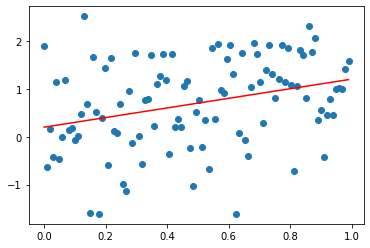

In [338]:
#Applying Newton method to the data (linear)
newton_lin = scipy.optimize.minimize(d_lin_NM, np.array([0.9, 0.2]), method='Newton-CG', jac=d_lin_deriv_new, hess=d_lin_hess, options={'xtol': 1e-3, 'disp':True})
print(newton_lin.x)
print(d_lin_NM(newton_lin.x))
plt.plot(x, newton_lin.x[0]*x + newton_lin.x[1], 'r')
plt.scatter(x,y)

Optimization terminated successfully.
         Current function value: 79.768247
         Iterations: 6
         Function evaluations: 10
         Gradient evaluations: 10
         Hessian evaluations: 6
[ 0.42604819 -0.67956238]
[79.76824694]


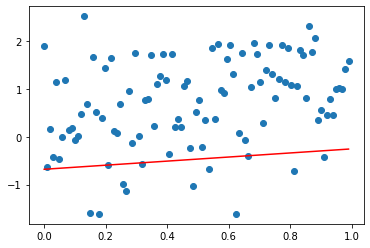

In [167]:
#Applying Newton method to the data (rational)
newton_rat = scipy.optimize.minimize(d_rat_NM, np.array([0, -0.4]), method='Newton-CG', jac=d_rat_deriv_new, hess=d_rat_hess, options={'xtol': 1e-3, 'disp':True})
print(newton_rat.x)
print(d_rat_NM(newton_rat.x))
plt.plot(x, newton_rat.x[0]*x + newton_rat.x[1], 'r')
plt.scatter(x,y)

In [8]:
#list of calculated functions for Levenberg-Marquardt method (linear)
def d_lin_lm(params):
    a,b=params
    k=np.ones(0)
    for i in range(y.size):
        k=np.append(k,y[i][0])
    return ((a*x+b)-k)**2

[0.68047228 0.25457469]


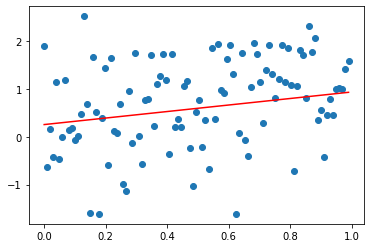

In [340]:
#Applying Levenberg-Marquardt method to the data (linear)
lm_lin = scipy.optimize.least_squares(d_lin_lm, [0.9, -0.8], method="lm", xtol=1e-3)
print(lm_lin.x)
plt.plot(x, lm_lin.x[0]*x + lm_lin.x[1], 'r')
plt.scatter(x,y)

In [7]:
#list of calculated functions for Levenberg-Marquardt method (rational)
def d_rat_lm(params):
    a,b=params
    k=np.ones(0)
    for i in range(y.size):
        k=np.append(k,y[i][0])
    return (a/(1+b*x)-k)**2

[ 0.33695832 -0.73692916]


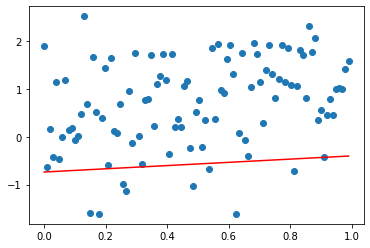

In [166]:
#Applying Levenberg-Marquardt method to the data (rational)
lm_rat = scipy.optimize.least_squares(d_rat_lm, [-0.7, -0.5], method="lm", xtol=1e-3)
print(lm_rat.x)
plt.plot(x, lm_rat.x[0]*x + lm_rat.x[1], 'r')
plt.scatter(x,y)

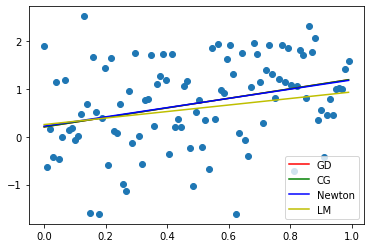

In [312]:
#Visualization of performance of various methods (linear)
plt.scatter(x,y)
plt.plot(x, descent_lin[0][0][0]* x + descent_lin[0][0][1], 'r', label='GD')
plt.plot(x, conjugate_lin[0][0][0]* x + conjugate_lin[0][0][1], 'g',label= 'CG')
plt.plot(x, newton_lin.x[0]*x + newton_lin.x[1], 'b',label='Newton')
plt.plot(x, lm_lin.x[0]*x + lm_lin.x[1], 'y',label='LM')
plt.legend()

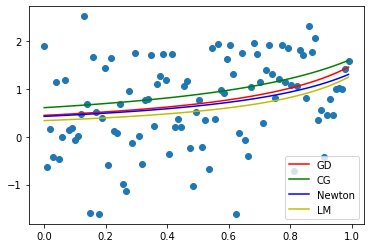

In [311]:
#Visualization of performance of various methods (rational)
plt.scatter(x,y)
plt.plot(x, descent_rat[0][0][0]/(1+ x * descent_rat[0][0][1]), 'r', label='GD')
plt.plot(x, conjugate_rat[0][0][0]/(1+ x * conjugate_rat[0][0][1]), 'g',label= 'CG')
plt.plot(x, newton_rat.x[0]/(1+ x * newton_rat.x[1]), 'b',label='Newton')
plt.plot(x, lm_rat.x[0]/(1+ x * lm_rat.x[1]), 'y',label='LM')
plt.legend()